Collaborators: Aditya Wakade

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.metrics import accuracy_score

In [2]:
#read the data
data = pd.read_csv('ionosphere.csv')
len(data)

351

#### Some information on the dataset
This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the [paper](https://pdfs.semanticscholar.org/e0d2/de05caacdfa8073b2b4f77c5e72cb2449b81.pdf) for more details. 

The targets were free electrons in the ionosphere."Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere. 

In order to check the effect of regularization on test data, split the data into train and test using sklearn.

In [3]:
#split the data into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, shuffle = False, train_size = 0.4)

/Users/manasi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
train1 = train[train.columns[0:34]]

In [5]:
test1 = test[test.columns[0:34]]

Create a model using Logistic Regression from sklearn. 

In [6]:
model = LogisticRegression().fit(train1, train['target'])

In [7]:
label_predict = model.predict(test1)

In [8]:
accuracy_score(test['target'], label_predict)

0.8578199052132701

    1. Perform a ridge regression using sklearn. Test for the accuracy on the test dataset

In [8]:
#perform ridge regression and test accuracy
model1 = LogisticRegression(penalty = 'l2').fit(train1, train['target'])

In [9]:
label_predict1 = model1.predict(test1)

In [10]:
accuracy_score(test['target'], label_predict1)

0.85781990521327012

    2. Perform lasso regression using sklearn. Test for the accuracy on the test dataset

In [11]:
#perform lasso regression and test accuracy
model2 = LogisticRegression(penalty = 'l1').fit(train1, train['target'])

In [12]:
label_predict2 = model2.predict(test1)

In [13]:
accuracy_score(test['target'], label_predict2)

0.88151658767772512

    3. Tune the parameters of C(1/lambda) and appropriate choice of regularization. Default values of C and regularization is 1.0 and 'l2' - ridge respectively. Record the results (accuracy, coefficients and lambdas) in a dataframe.

In [14]:
#perform tuning and record the results C = 0.01, 0.001 and 0.0001 and regularization l1
cc = np.logspace(-5,5,20)
lam = 1/cc
var = np.zeros(shape = (20,36))
acc = list()
for i in range(0,20):
    model3 = LogisticRegression(penalty = 'l2', C = cc[i]).fit(train1, train['target'])
    label_predict3 = model3.predict(test1)
    l = list(model3.coef_)[0]
    for j in range(0,34):
        var[i,j] = l[j]
    var[i,35] = accuracy_score(test['target'], label_predict3)

c = pd.DataFrame(var)
c

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.000100,0.0,0.000185,0.000016,0.000192,0.000028,0.000182,0.000060,0.000149,0.000026,...,-0.000034,0.000027,0.000141,-0.000014,0.000104,-0.000020,0.000083,-0.000020,0.0,0.772512
1,0.000332,0.0,0.000620,0.000055,0.000642,0.000095,0.000608,0.000203,0.000497,0.000089,...,-0.000118,0.000089,0.000473,-0.000046,0.000347,-0.000066,0.000277,-0.000066,0.0,0.772512
2,0.001082,0.0,0.002054,0.000185,0.002127,0.000319,0.002014,0.000684,0.001640,0.000296,...,-0.000421,0.000301,0.001567,-0.000152,0.001144,-0.000220,0.000910,-0.000220,0.0,0.777251
3,0.003302,0.0,0.006584,0.000645,0.006829,0.001066,0.006455,0.002333,0.005211,0.000980,...,-0.001666,0.001013,0.005029,-0.000480,0.003617,-0.000722,0.002850,-0.000713,0.0,0.781991
4,0.008229,0.0,0.019365,0.002349,0.020163,0.003526,0.018961,0.008111,0.014901,0.003142,...,-0.007722,0.003378,0.014840,-0.001358,0.010183,-0.002280,0.007770,-0.002179,0.0,0.781991
5,0.011856,0.0,0.048827,0.008702,0.051239,0.011653,0.047534,0.028169,0.034919,0.009481,...,-0.037099,0.010335,0.037500,-0.003470,0.022762,-0.006941,0.015677,-0.006399,0.0,0.815166
6,-0.000480,0.0,0.109114,0.029206,0.114823,0.039561,0.103620,0.089256,0.068432,0.026192,...,-0.144258,0.022967,0.081337,-0.010808,0.039504,-0.020747,0.019816,-0.021303,0.0,0.791469
7,-0.021377,0.0,0.235955,0.082187,0.241821,0.126578,0.208645,0.230954,0.129252,0.063906,...,-0.405493,0.022719,0.158743,-0.033529,0.059609,-0.049362,0.006546,-0.076390,0.0,0.819905
8,0.019041,0.0,0.466827,0.183364,0.456681,0.309956,0.363235,0.464934,0.241862,0.135386,...,-0.839039,-0.022302,0.281336,-0.060387,0.086124,-0.067516,-0.050625,-0.230973,0.0,0.819905
9,0.260635,0.0,0.792892,0.278099,0.747332,0.566559,0.500645,0.774986,0.433520,0.252783,...,-1.400548,-0.121958,0.474134,-0.021142,0.121899,-0.019093,-0.187957,-0.546838,0.0,0.848341


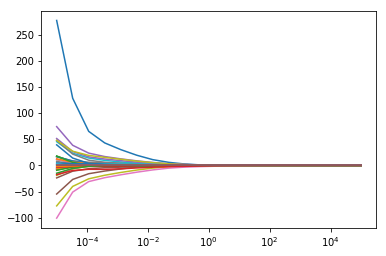

In [15]:
fig, ax = plt.subplots()
ax = plt.gca()
for i in range(0,35):
    ax.set_xscale('log')
    ax.plot(lam, c[i])

ax.set_xscale('log')
ax.plot(lam, c[35])

In [16]:
#perform tuning and record the results C = 0.01, 0.001 and 0.0001 and regularization l1
cc = np.logspace(-5,5,20)
lam = 1/cc
var = np.zeros(shape = (20,36))
acc = list()
for i in range(0,20):
    model3 = LogisticRegression(penalty = 'l1', C = cc[i]).fit(train1, train['target'])
    label_predict3 = model3.predict(test1)
    l = list(model3.coef_)[0]
    for j in range(0,34):
        var[i,j] = l[j]
    var[i,35] = accuracy_score(test['target'], label_predict3)

c = pd.DataFrame(var)
c

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.270142
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.270142
2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.270142
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.270142
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.270142
5,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.270142
6,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.270142
7,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.270142
8,0.000000,0.0,0.430716,0.000000,0.426866,0.000000,0.153711,0.024742,0.000000,0.000000,...,-0.463147,0.000000,0.021073,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.796209
9,0.416551,0.0,1.240800,0.000000,0.966546,0.284599,0.478185,0.698766,0.000000,0.000000,...,-1.357939,0.000000,0.258920,0.000000,0.000000,0.000000,0.000000,-0.117212,0.0,0.857820


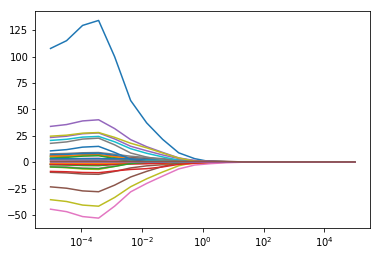

In [17]:
fig, ax = plt.subplots()
ax = plt.gca()
for i in range(0,35):
    ax.set_xscale('log')
    ax.plot(lam, c[i])

ax.set_xscale('log')
ax.plot(lam, c[35])